In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas_datareader as pdr
key="0d2742140da1186402077c574b6026778feb9993"

In [4]:
df = pdr.get_data_tiingo('FB', api_key=key)

In [5]:
df.to_csv('FB.csv')

In [6]:
df=pd.read_csv('FB.csv')

In [7]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,FB,2016-11-17 00:00:00+00:00,117.79,117.7900,116.01,116.81,18597766,117.79,117.7900,116.01,116.81,18597766,0.0,1.0
1,FB,2016-11-18 00:00:00+00:00,117.02,119.1300,116.84,118.39,22879303,117.02,119.1300,116.84,118.39,22879303,0.0,1.0
2,FB,2016-11-21 00:00:00+00:00,121.77,121.9500,117.80,118.20,35415366,121.77,121.9500,117.80,118.20,35415366,0.0,1.0
3,FB,2016-11-22 00:00:00+00:00,121.47,122.9800,120.90,122.40,26089163,121.47,122.9800,120.90,122.40,26089163,0.0,1.0
4,FB,2016-11-23 00:00:00+00:00,120.84,121.3100,119.94,121.23,15672136,120.84,121.3100,119.94,121.23,15672136,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,FB,2021-11-09 00:00:00+00:00,335.37,341.3075,334.47,340.00,17469000,335.37,341.3075,334.47,340.00,17469000,0.0,1.0
1253,FB,2021-11-10 00:00:00+00:00,327.64,333.1900,325.51,332.49,21872605,327.64,333.1900,325.51,332.49,21872605,0.0,1.0
1254,FB,2021-11-11 00:00:00+00:00,327.74,332.4590,327.00,329.82,12376563,327.74,332.4590,327.00,329.82,12376563,0.0,1.0
1255,FB,2021-11-12 00:00:00+00:00,340.89,341.8600,329.78,330.18,25099642,340.89,341.8600,329.78,330.18,25099642,0.0,1.0


In [8]:
df1=df.reset_index()['close']

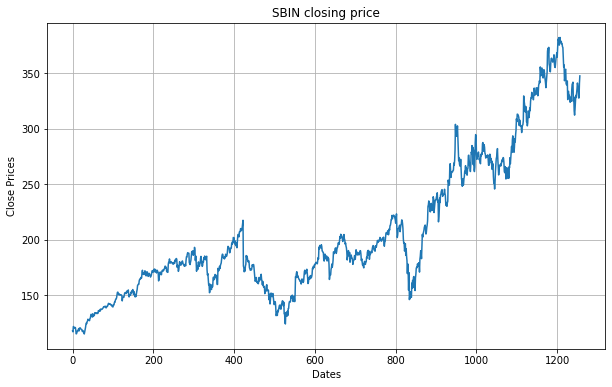

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['close'])
plt.title('SBIN closing price')
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
print(df1)

[[0.01025718]
 [0.00737469]
 [0.02515629]
 ...
 [0.7962041 ]
 [0.84543106]
 [0.87040018]]


In [12]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(817, 440)

In [14]:
train_data

array([[1.02571782e-02],
       [7.37468648e-03],
       [2.51562909e-02],
       [2.40332422e-02],
       [2.16748400e-02],
       [1.99528320e-02],
       [2.00651368e-02],
       [2.17871448e-02],
       [1.26155804e-02],
       [1.87174784e-04],
       [1.31022349e-03],
       [8.90951971e-03],
       [8.46030023e-03],
       [1.08561375e-02],
       [1.44498933e-02],
       [1.73323850e-02],
       [1.01823082e-02],
       [1.96907873e-02],
       [1.93164377e-02],
       [2.06640961e-02],
       [1.80436492e-02],
       [1.56852469e-02],
       [1.51237225e-02],
       [1.49365477e-02],
       [8.79721484e-03],
       [8.31056040e-03],
       [1.10807472e-02],
       [7.00033691e-03],
       [4.86654438e-03],
       [0.00000000e+00],
       [6.77572717e-03],
       [1.36263243e-02],
       [2.10384457e-02],
       [3.12956239e-02],
       [3.68734324e-02],
       [3.48145098e-02],
       [4.13281923e-02],
       [4.33122450e-02],
       [4.97510575e-02],
       [4.79916146e-02],


In [15]:
test_data

array([[0.37259012],
       [0.35611874],
       [0.32070527],
       [0.30591847],
       [0.30752817],
       [0.27963913],
       [0.28982144],
       [0.30468311],
       [0.26518923],
       [0.28716355],
       [0.26249392],
       [0.24722045],
       [0.20383334],
       [0.23636432],
       [0.20660353],
       [0.1475686 ],
       [0.20675327],
       [0.11589863],
       [0.12866395],
       [0.11945495],
       [0.14255232],
       [0.12982443],
       [0.12372253],
       [0.17193876],
       [0.15408228],
       [0.18077341],
       [0.15625351],
       [0.19054393],
       [0.1937259 ],
       [0.16677273],
       [0.1614944 ],
       [0.14648299],
       [0.18904653],
       [0.2013252 ],
       [0.22172725],
       [0.22513383],
       [0.22363643],
       [0.23628945],
       [0.23179725],
       [0.22910194],
       [0.24029499],
       [0.23655149],
       [0.20869988],
       [0.25167521],
       [0.26234418],
       [0.28083705],
       [0.27121626],
       [0.254

In [16]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [20]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
12/12 [==============================] - 7s 226ms/step - loss: 0.0108 - val_loss: 0.1006
Epoch 2/50
12/12 [==============================] - 2s 136ms/step - loss: 0.0024 - val_loss: 0.0346
Epoch 3/50
12/12 [==============================] - 2s 136ms/step - loss: 0.0016 - val_loss: 0.0269
Epoch 4/50
12/12 [==============================] - 2s 133ms/step - loss: 0.0012 - val_loss: 0.0208
Epoch 5/50
12/12 [==============================] - 2s 134ms/step - loss: 0.0010 - val_loss: 0.0089
Epoch 6/50
12/12 [==============================] - 2s 135ms/step - loss: 9.8927e-04 - val_loss: 0.0050
Epoch 7/50
12/12 [==============================] - 2s 135ms/step - loss: 9.5954e-04 - val_loss: 0.0056
Epoch 8/50
12/12 [==============================] - 2s 135ms/step - loss: 0.0010 - val_loss: 0.0091
Epoch 9/50
12/12 [==============================] - 2s 135ms/step - loss: 9.4135e-04 - val_loss: 0.0084
Epoch 10/50
12/12 [==============================] - 2s 134ms/step - loss: 9.3228e-04 - 

In [25]:
import tensorflow as tf

In [26]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

174.88270989873624

In [29]:
math.sqrt(mean_squared_error(ytest,test_predict))

282.4686553724607

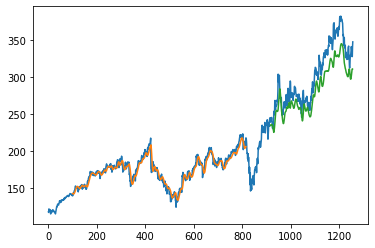

In [30]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()